In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

# Define the ConvDQN model
class ConvDQN(nn.Module):
    def __init__(self, input_dim, output_dim, window_size):
        super(ConvDQN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * window_size, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Change the shape to (batch_size, num_features, window_size)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output from the conv layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
input_dim = 7
output_dim = 3
window_size = 26
model = ConvDQN(input_dim, output_dim, window_size)

# Generate a dummy input tensor with the correct shape
# Assume batch_size is 1 for visualization
dummy_input = torch.randn(1, window_size, input_dim)

# Pass the dummy input through the model to generate the graph
output = model(dummy_input)

# Visualize the model using torchviz
graph = make_dot(output, params=dict(model.named_parameters()))
graph.render("conv_dqn_model", format="png")
graph.view()


'conv_dqn_model.pdf'

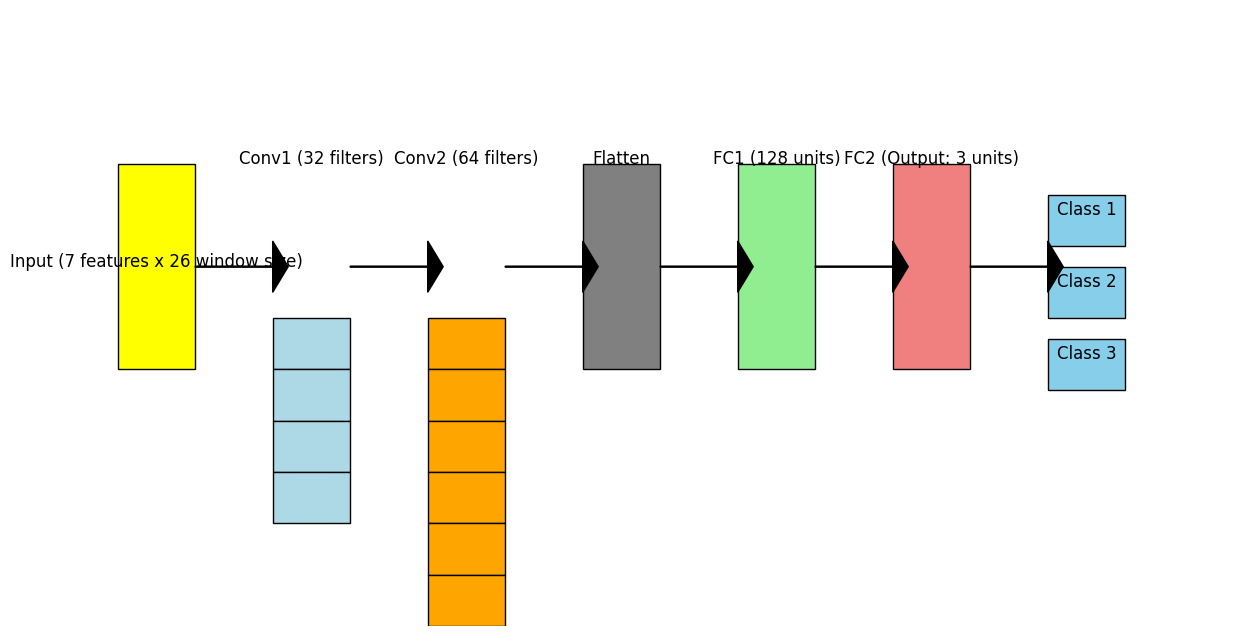

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Draw the input grid
ax.text(0.1, 0.75, 'Input (7 features x 26 window size)', fontsize=12, ha='center')
input_rect = patches.Rectangle((0.05, 0.65), 0.1, 0.2, linewidth=1, edgecolor='black', facecolor='yellow')
ax.add_patch(input_rect)

# Draw the first convolutional layer grid
ax.text(0.3, 0.85, 'Conv1 (32 filters)', fontsize=12, ha='center')
for i in range(4):
    conv1_rect = patches.Rectangle((0.25, 0.65 - i*0.05), 0.1, 0.05, linewidth=1, edgecolor='black', facecolor='lightblue')
    ax.add_patch(conv1_rect)

# Draw the arrow from input to Conv1
ax.arrow(0.15, 0.75, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')

# Draw the second convolutional layer grid
ax.text(0.5, 0.85, 'Conv2 (64 filters)', fontsize=12, ha='center')
for i in range(6):
    conv2_rect = patches.Rectangle((0.45, 0.65 - i*0.05), 0.1, 0.05, linewidth=1, edgecolor='black', facecolor='orange')
    ax.add_patch(conv2_rect)

# Draw the arrow from Conv1 to Conv2
ax.arrow(0.35, 0.75, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')

# Draw the flatten layer
ax.text(0.7, 0.85, 'Flatten', fontsize=12, ha='center')
flatten_rect = patches.Rectangle((0.65, 0.65), 0.1, 0.2, linewidth=1, edgecolor='black', facecolor='gray')
ax.add_patch(flatten_rect)

# Draw the arrow from Conv2 to Flatten
ax.arrow(0.55, 0.75, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')

# Draw the first fully connected layer grid
ax.text(0.9, 0.85, 'FC1 (128 units)', fontsize=12, ha='center')
fc1_rect = patches.Rectangle((0.85, 0.65), 0.1, 0.2, linewidth=1, edgecolor='black', facecolor='lightgreen')
ax.add_patch(fc1_rect)

# Draw the arrow from Flatten to FC1
ax.arrow(0.75, 0.75, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')

# Draw the second fully connected layer grid
ax.text(1.1, 0.85, 'FC2 (Output: 3 units)', fontsize=12, ha='center')
fc2_rect = patches.Rectangle((1.05, 0.65), 0.1, 0.2, linewidth=1, edgecolor='black', facecolor='lightcoral')
ax.add_patch(fc2_rect)

# Draw the arrow from FC1 to FC2
ax.arrow(0.95, 0.75, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')

# Draw the output nodes
output_labels = ['Class 1', 'Class 2', 'Class 3']
for i, label in enumerate(output_labels):
    ax.text(1.3, 0.8 - i*0.07, label, fontsize=12, ha='center')
    output_rect = patches.Rectangle((1.25, 0.77 - i*0.07), 0.1, 0.05, linewidth=1, edgecolor='black', facecolor='skyblue')
    ax.add_patch(output_rect)

# Draw the arrow from FC2 to Output
ax.arrow(1.15, 0.75, 0.1, 0, head_width=0.05, head_length=0.02, fc='k', ec='k')

# Set limits and remove axes
ax.set_xlim(0, 1.5)
ax.set_ylim(0.4, 1)
ax.axis('off')

# Display the figure
plt.show()
